In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-upwind-direction)

If we solve advection over $[0,1]$ with velocity $c=-1$, the right boundary is in the upwind/inflow direction. Thus a well-posed boundary condition is $u(1,t)=0$.

We'll pattern a solution after {numref}`Function {number} <function-parabolic>`. Since $u(x_m,t)=0$, we define the ODE interior problem {eq}`mol-interior` for $\mathbf{v}$ without $u_m$. For each evaluation of $\mathbf{v}'$, we must extend the data back to $x_m$ first.

In [2]:
m = 100
x, Dₓ = FNC.diffmat2(m, [0, 1])

interior = 1:m
extend = v -> [v; 0]

function ode!(f, v, c, t)
    u = extend(v)
    uₓ = Dₓ * u
    @. f = -c * uₓ[interior]
end;

Now we solve for an initial condition that has a single hump.

In [3]:
using OrdinaryDiffEq
init = @. exp( -80*(x[interior] - 0.5)^2 )
ivp = ODEProblem(ode!, init, (0., 1), -1)
u = solve(ivp);

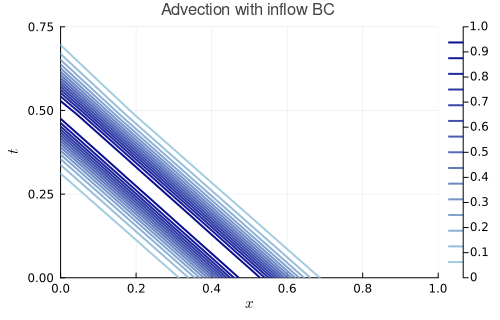

In [4]:
t = range(0, 0.75, 80)
U = reduce(hcat, extend(u(t)) for t in t)
contour(x, t, U';
    color=:blues,  clims=(0, 1), 
    xaxis=(L"x"),  yaxis=(L"t"),
    title="Advection with inflow BC")

We find that the hump gracefully exits out the downwind end.

In [5]:
anim = @animate for t in range(0, 1, 161) 
    plot(x, extend(u(t));
        label=@sprintf("t = %.4f", t), 
        xaxis=(L"x"),  yaxis=(L"u(x, t)", (0, 1)), 
        title="Advection equation with inflow BC",  dpi=150)
end
mp4(anim,"upwind-inflow.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section2/julia/upwind-inflow.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section2/julia/upwind-inflow.mp4")

If instead of $u(1,t)=0$ we were to try to impose the downwind condition $u(0,t)=0$, we only need to change the index of the interior nodes and where to append the zero value.

In [6]:
interior = 2:m+1
extend = v -> [0; v]

init = @. exp( -80*(x[interior] - 0.5)^2 )
ivp = ODEProblem(ode!, init, (0., 0.25), -1)
u = solve(ivp);

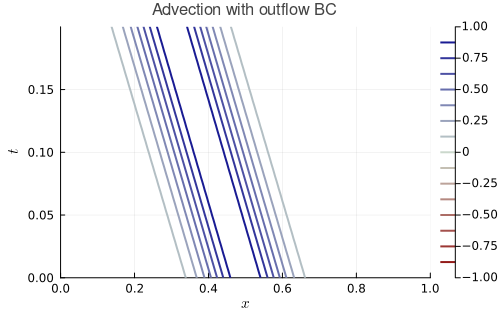

In [7]:
t = range(0, 0.2, 61)
U = reduce(hcat, extend(u(t)) for t in t)
contour(x, t, U'; 
    color=:redsblues,  clims=(-1, 1),
    xaxis=(L"x"),  yaxis=(L"t"), 
    title="Advection with outflow BC",  right_margin=3Plots.mm)

This time, the solution blows up as soon as the hump runs into the boundary because there are conflicting demands there.

In [8]:
anim = @animate for t in range(0, 0.2, 41) 
    plot(x, extend(u(t));
        label=@sprintf("t = %.4f", t),
        xaxis=(L"x"),  yaxis=(L"u(x,t)", (0, 1)), 
        title="Advection equation with outflow BC",  dpi=150)
end
mp4(anim,"upwind-outflow.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section2/julia/upwind-outflow.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section2/julia/upwind-outflow.mp4")